In [1]:
import pandas as pd
import missingno as msno
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
#Read data
data = pd.read_excel("/Users/apple/Developer/Hamoye/Theano/Africa_1997-2023_Mar31.xlsx")
data.head()

EVENT_ID_CNTY EVENT_DATE  YEAR  TIME_PRECISION       DISORDER_TYPE  \
0          ALG1 1997-01-01  1997               1  Political violence   
1          ALG2 1997-01-02  1997               1  Political violence   
2          ALG3 1997-01-03  1997               1  Political violence   
3          ALG4 1997-01-04  1997               1  Political violence   
4          ALG5 1997-01-05  1997               1  Political violence   

                   EVENT_TYPE SUB_EVENT_TYPE                    ACTOR1  \
0  Violence against civilians         Attack  GIA: Armed Islamic Group   
1  Violence against civilians         Attack  GIA: Armed Islamic Group   
2  Violence against civilians         Attack  GIA: Armed Islamic Group   
3  Violence against civilians         Attack  GIA: Armed Islamic Group   
4  Violence against civilians         Attack  GIA: Armed Islamic Group   

  ASSOC_ACTOR_1  INTER1  ... Unnamed: 31            Unnamed: 32  Unnamed: 33  \
0           NaN       2  ...         NaN                    NaN          NaN   
1           NaN       2  ...         NaN                    NaN          NaN   
2           NaN       2  ...         NaN                   TAGS          NaN   
3           NaN       2  ...         NaN                    NaN          NaN   
4           NaN       2  ...         NaN  women targeted: girls          NaN   

   Unnamed: 34 Unnamed: 35  Unnamed: 36         Unnamed: 37 Unnamed: 38  \
0          NaN         NaN          NaN                 NaN         NaN   
1          NaN         NaN          NaN                 NaN         NaN   
2          NaN         NaN          NaN  CIVILIAN_TARGETING         NaN   
3          NaN         NaN          NaN  Civilian targeting         NaN   
4          NaN         NaN          NaN                 NaN         NaN   

  Unnamed: 39         Unnamed: 40  
0         NaN                 NaN  
1         NaN                 NaN  
2         NaN       DISORDER_TYPE  
3         NaN  Political violence  
4         NaN      Demonstrations  

[5 rows x 41 columns]

In [3]:
data.head().T

0  \
EVENT_ID_CNTY                                                    ALG1   
EVENT_DATE                                        1997-01-01 00:00:00   
YEAR                                                             1997   
TIME_PRECISION                                                      1   
DISORDER_TYPE                                      Political violence   
EVENT_TYPE                                 Violence against civilians   
SUB_EVENT_TYPE                                                 Attack   
ACTOR1                                       GIA: Armed Islamic Group   
ASSOC_ACTOR_1                                                     NaN   
INTER1                                                              2   
ACTOR2                                            Civilians (Algeria)   
ASSOC_ACTOR_2                                                     NaN   
INTER2                                                              7   
INTERACTION                                                        27   
CIVILIAN_TARGETING                                 Civilian targeting   
ISO                                                                12   
REGION                                                Northern Africa   
COUNTRY                                                       Algeria   
ADMIN1                                                         Tipaza   
ADMIN2                                                       Douaouda   
ADMIN3                                                            NaN   
LOCATION                                                     Douaouda   
LATITUDE                                                       36.672   
LONGITUDE                                                       2.789   
GEO_PRECISION                                                       1   
SOURCE                                                  Algeria Watch   
SOURCE_SCALE                                                    Other   
NOTES               5 January: Beheading of 5 citizens in Douaouda...   
FATALITIES                                                          5   
TAGS                                                              NaN   
TIMESTAMP                                                  1582579226   
Unnamed: 31                                                       NaN   
Unnamed: 32                                                       NaN   
Unnamed: 33                                                       NaN   
Unnamed: 34                                                       NaN   
Unnamed: 35                                                       NaN   
Unnamed: 36                                                       NaN   
Unnamed: 37                                                       NaN   
Unnamed: 38                                                       NaN   
Unnamed: 39                                                       NaN   
Unnamed: 40                                                       NaN   

                                                          1  \
EVENT_ID_CNTY                                          ALG2   
EVENT_DATE                              1997-01-02 00:00:00   
YEAR                                                   1997   
TIME_PRECISION                                            1   
DISORDER_TYPE                            Political violence   
EVENT_TYPE                       Violence against civilians   
SUB_EVENT_TYPE                                       Attack   
ACTOR1                             GIA: Armed Islamic Group   
ASSOC_ACTOR_1                                           NaN   
INTER1                                                    2   
ACTOR2                                  Civilians (Algeria)   
ASSOC_ACTOR_2                                           NaN   
INTER2                                                    7   
INTERACTION                                              27   
CIVILIAN_TARGETING                       Civilian target

In [4]:
conflict_count = data["COUNTRY"].value_counts()

<AxesSubplot: >

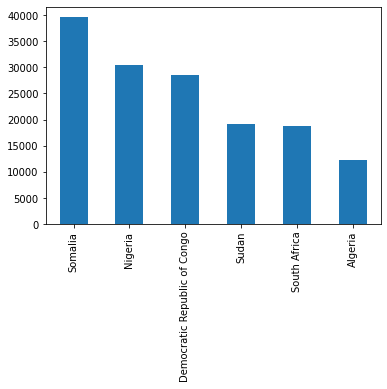

In [5]:
conflict_count.head(6).plot(kind="bar")

<AxesSubplot: >

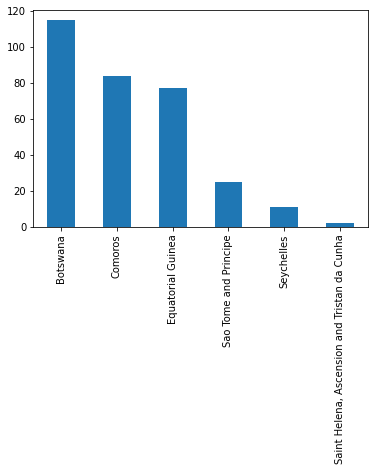

In [6]:
conflict_count.tail(6).plot(kind="bar")

### Creating a pandas dataframe only containing the top 3 countries 

In [7]:
#most = data.query("COUNTRY in ('Somalia', 'Nigeria','Democratic Republic of Congo')")
top_countries = ['Somalia', 'Nigeria','Democratic Republic of Congo']

In [8]:
# Filter the DataFrame to only include data from the top 3 countries
crime_data = data[data['COUNTRY'].isin(top_countries)]

# Print the filtered DataFrame
#print(crime_data)

# Save the filtered data into a new pandas DataFrame
top_crimes = pd.DataFrame(crime_data)

# Print the new DataFrame to confirm the data has been saved
#print(top_crimes)

# Save the filtered data to an Excel file
#top_crimes.to_excel('top_crimes_countries_data.xlsx', index=False)

In [9]:
top_countries = pd.read_excel("/Users/apple/Developer/Hamoye/Theano/top_crimes_countries_data.xlsx")
top_countries.head()

EVENT_ID_CNTY EVENT_DATE  YEAR  TIME_PRECISION           DISORDER_TYPE  \
0         DRC65 1997-02-27  1997               1      Political violence   
1         DRC66 1997-02-28  1997               1  Strategic developments   
2         DRC67 1997-02-28  1997               1      Political violence   
3         DRC68 1997-03-01  1997               1      Political violence   
4         DRC69 1997-03-01  1997               1      Political violence   

               EVENT_TYPE                       SUB_EVENT_TYPE  \
0                 Battles  Non-state actor overtakes territory   
1  Strategic developments             Change to group/activity   
2                 Battles                          Armed clash   
3                 Battles  Non-state actor overtakes territory   
4                 Battles  Non-state actor overtakes territory   

                                              ACTOR1 ASSOC_ACTOR_1  INTER1  \
0  ADFL: Alliance of Democratic Forces for Libera...           NaN       2   
1  ADFL: Alliance of Democratic Forces for Libera...           NaN       2   
2  ADFL: Alliance of Democratic Forces for Libera...           NaN       2   
3  ADFL: Alliance of Democratic Forces for Libera...           NaN       2   
4  ADFL: Alliance of Democratic Forces for Libera...           NaN       2   

   ... Unnamed: 31 Unnamed: 32  Unnamed: 33  Unnamed: 34 Unnamed: 35  \
0  ...         NaN         NaN          NaN          NaN         NaN   
1  ...         NaN         NaN          NaN          NaN         NaN   
2  ...         NaN         NaN          NaN          NaN         NaN   
3  ...         NaN         NaN          NaN          NaN         NaN   
4  ...         NaN         NaN          NaN          NaN         NaN   

   Unnamed: 36 Unnamed: 37 Unnamed: 38 Unnamed: 39 Unnamed: 40  
0          NaN         NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN         NaN  

[5 rows x 41 columns]

In [10]:
print(top_countries["COUNTRY"].unique())

['Democratic Republic of Congo' 'Nigeria' 'Somalia']


In [11]:
top_countries.isnull().sum()

EVENT_ID_CNTY             0
EVENT_DATE                0
YEAR                      0
TIME_PRECISION            0
DISORDER_TYPE             0
EVENT_TYPE                0
SUB_EVENT_TYPE            0
ACTOR1                    0
ASSOC_ACTOR_1         81617
INTER1                    0
ACTOR2                14175
ASSOC_ACTOR_2         79930
INTER2                    0
INTERACTION               0
CIVILIAN_TARGETING    66662
ISO                       0
REGION                    0
COUNTRY                   0
ADMIN1                    1
ADMIN2                  797
ADMIN3                77535
LOCATION                  0
LATITUDE                  0
LONGITUDE                 0
GEO_PRECISION             0
SOURCE                    0
SOURCE_SCALE              0
NOTES                     0
FATALITIES                0
TAGS                  89680
TIMESTAMP                 0
Unnamed: 31           98617
Unnamed: 32           98617
Unnamed: 33           98617
Unnamed: 34           98617
Unnamed: 35         

In [12]:
top_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98617 entries, 0 to 98616
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EVENT_ID_CNTY       98617 non-null  object        
 1   EVENT_DATE          98617 non-null  datetime64[ns]
 2   YEAR                98617 non-null  int64         
 3   TIME_PRECISION      98617 non-null  int64         
 4   DISORDER_TYPE       98617 non-null  object        
 5   EVENT_TYPE          98617 non-null  object        
 6   SUB_EVENT_TYPE      98617 non-null  object        
 7   ACTOR1              98617 non-null  object        
 8   ASSOC_ACTOR_1       17000 non-null  object        
 9   INTER1              98617 non-null  int64         
 10  ACTOR2              84442 non-null  object        
 11  ASSOC_ACTOR_2       18687 non-null  object        
 12  INTER2              98617 non-null  int64         
 13  INTERACTION         98617 non-null  int64     

In [13]:
top_countries.shape

(98617, 41)

In [14]:
top_countries.isnull().sum()

EVENT_ID_CNTY             0
EVENT_DATE                0
YEAR                      0
TIME_PRECISION            0
DISORDER_TYPE             0
EVENT_TYPE                0
SUB_EVENT_TYPE            0
ACTOR1                    0
ASSOC_ACTOR_1         81617
INTER1                    0
ACTOR2                14175
ASSOC_ACTOR_2         79930
INTER2                    0
INTERACTION               0
CIVILIAN_TARGETING    66662
ISO                       0
REGION                    0
COUNTRY                   0
ADMIN1                    1
ADMIN2                  797
ADMIN3                77535
LOCATION                  0
LATITUDE                  0
LONGITUDE                 0
GEO_PRECISION             0
SOURCE                    0
SOURCE_SCALE              0
NOTES                     0
FATALITIES                0
TAGS                  89680
TIMESTAMP                 0
Unnamed: 31           98617
Unnamed: 32           98617
Unnamed: 33           98617
Unnamed: 34           98617
Unnamed: 35         

In [21]:
top_countries.head().T

0  \
EVENT_ID_CNTY                                                   DRC65   
EVENT_DATE                                        1997-02-27 00:00:00   
YEAR                                                             1997   
TIME_PRECISION                                                      1   
DISORDER_TYPE                                      Political violence   
EVENT_TYPE                                                    Battles   
SUB_EVENT_TYPE                    Non-state actor overtakes territory   
ACTOR1              ADFL: Alliance of Democratic Forces for Libera...   
ASSOC_ACTOR_1                                                     NaN   
INTER1                                                              2   
ACTOR2              Military Forces of the Democratic Republic of ...   
ASSOC_ACTOR_2                                                     NaN   
INTER2                                                              1   
INTERACTION                                                        12   
CIVILIAN_TARGETING                                                NaN   
ISO                                                               180   
REGION                                                  Middle Africa   
COUNTRY                                  Democratic Republic of Congo   
ADMIN1                                                        Maniema   
ADMIN2                                                          Kindu   
ADMIN3                                                          Kindu   
LOCATION                                                        Kindu   
LATITUDE                                                       -2.944   
LONGITUDE                                                      25.922   
GEO_PRECISION                                                       1   
SOURCE                                                        Reuters   
SOURCE_SCALE                                            International   
NOTES               ADLF rebels take control of the town of Kindu ...   
FATALITIES                                                          0   
TAGS                                                              NaN   
TIMESTAMP                                                  1677550788   
Unnamed: 31                                                       NaN   
Unnamed: 32                                                       NaN   
Unnamed: 33                                                       NaN   
Unnamed: 34                                                       NaN   
Unnamed: 35                                                       NaN   
Unnamed: 36                                                       NaN   
Unnamed: 37                                                       NaN   
Unnamed: 38                                                       NaN   
Unnamed: 39                                                       NaN   
Unnamed: 40                                                       NaN   

                                                                    1  \
EVENT_ID_CNTY                                                   DRC66   
EVENT_DATE                                        1997-02-28 00:00:00   
YEAR                                                             1997   
TIME_PRECISION                                                      1   
DISORDER_TYPE                                  Strategic developments   
EVENT_TYPE                                     Strategic developments   
SUB_EVENT_TYPE                               Change to group/activity   
ACTOR1              ADFL: Alliance of Democratic Forces for Libera...   
ASSOC_ACTOR_1                                                     NaN   
INTER1                                                              2   
ACTOR2                                                            NaN   
ASSOC_ACTOR_2                                                     NaN   
INTER2                                              

### EDA using Dtale library

In [15]:
import dtale

In [16]:
dtale.show(top_countries)

/opt/homebrew/anaconda3/envs/env_hamoye/lib/python3.9/site-packages/dtale/views.py:862: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/opt/homebrew/anaconda3/envs/env_hamoye/lib/python3.9/site-packages/dtale/views.py:755: FutureWarning:

['ASSOC_ACTOR_1', 'ACTOR2', 'ASSOC_ACTOR_2', 'CIVILIAN_TARGETING', 'ADMIN1', 'ADMIN2', 'ADMIN3', 'TAGS'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



### EDA using Pandas Profiling library

In [18]:
from pandas_profiling import ProfileReport

2023-04-14 22:06:54,542 - INFO     - Pandas backend loaded 1.5.2
2023-04-14 22:06:54,547 - INFO     - Numpy backend loaded 1.23.5
2023-04-14 22:06:54,548 - INFO     - Pyspark backend NOT loaded
2023-04-14 22:06:54,548 - INFO     - Python backend loaded
/var/folders/qr/0fybjr613n73jh15hp4xw7140000gn/T/ipykernel_5456/2274191625.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [19]:
profile = ProfileReport(top_countries, title="Pandas Profiling Report")

In [20]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
import seaborn as sns

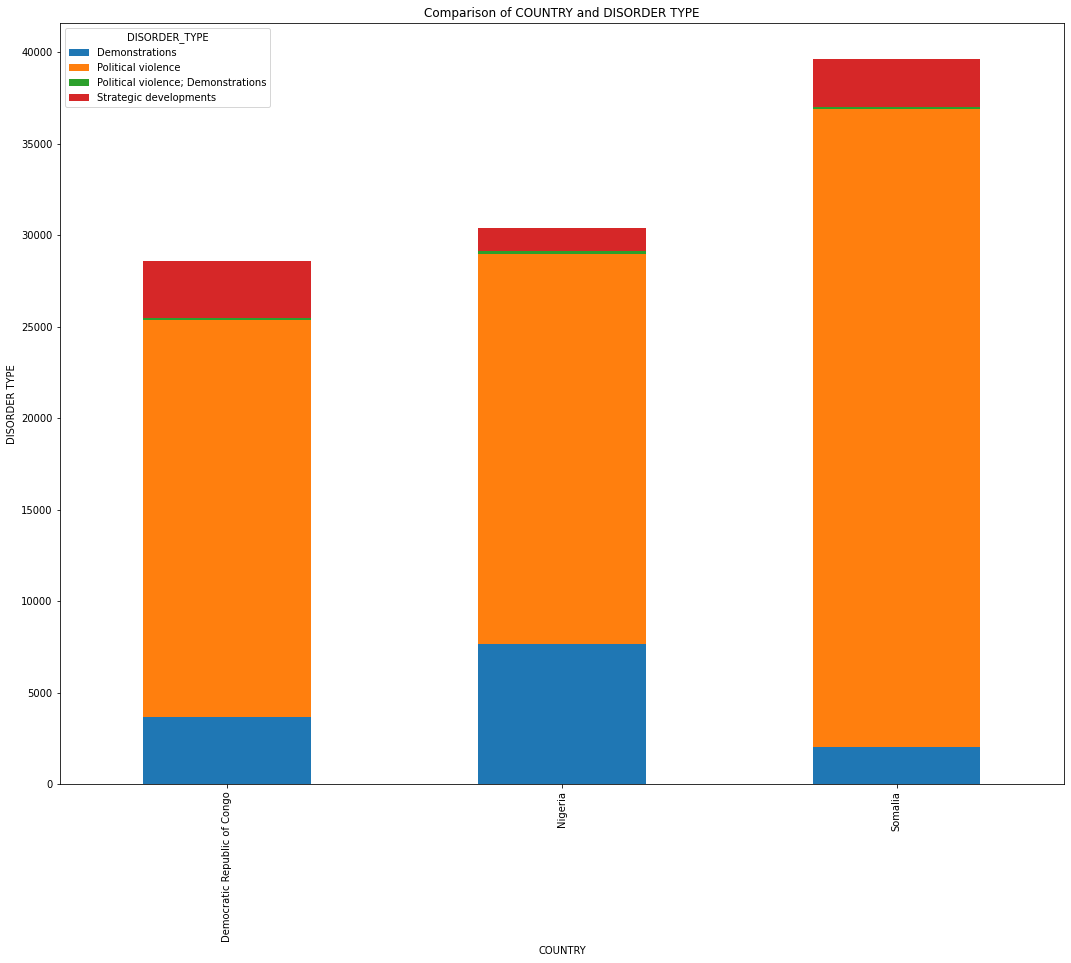

In [37]:
grouped_df = top_countries.groupby(['COUNTRY', 'DISORDER_TYPE'])['COUNTRY'].count().unstack('DISORDER_TYPE')
fig, ax = plt.subplots(figsize=(18,14)) # increase the figure size here

grouped_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('COUNTRY')
ax.set_ylabel('DISORDER TYPE')
ax.set_title('Comparison of COUNTRY and DISORDER TYPE')
plt.show()

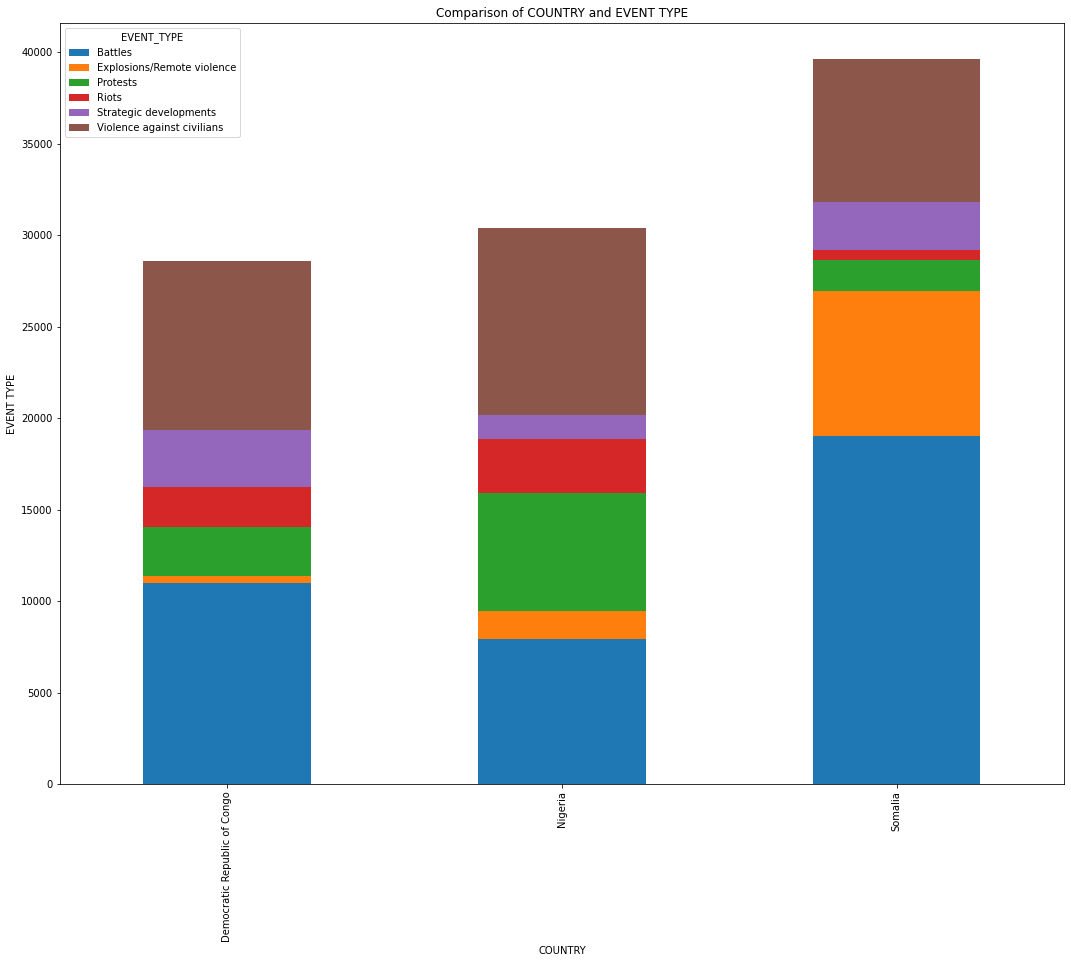

In [38]:
grouped_df = top_countries.groupby(['COUNTRY', 'EVENT_TYPE'])['COUNTRY'].count().unstack('EVENT_TYPE')
fig, ax = plt.subplots(figsize=(18,14)) # increase the figure size here

grouped_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('COUNTRY')
ax.set_ylabel('EVENT TYPE')
ax.set_title('Comparison of COUNTRY and EVENT TYPE')
plt.show()

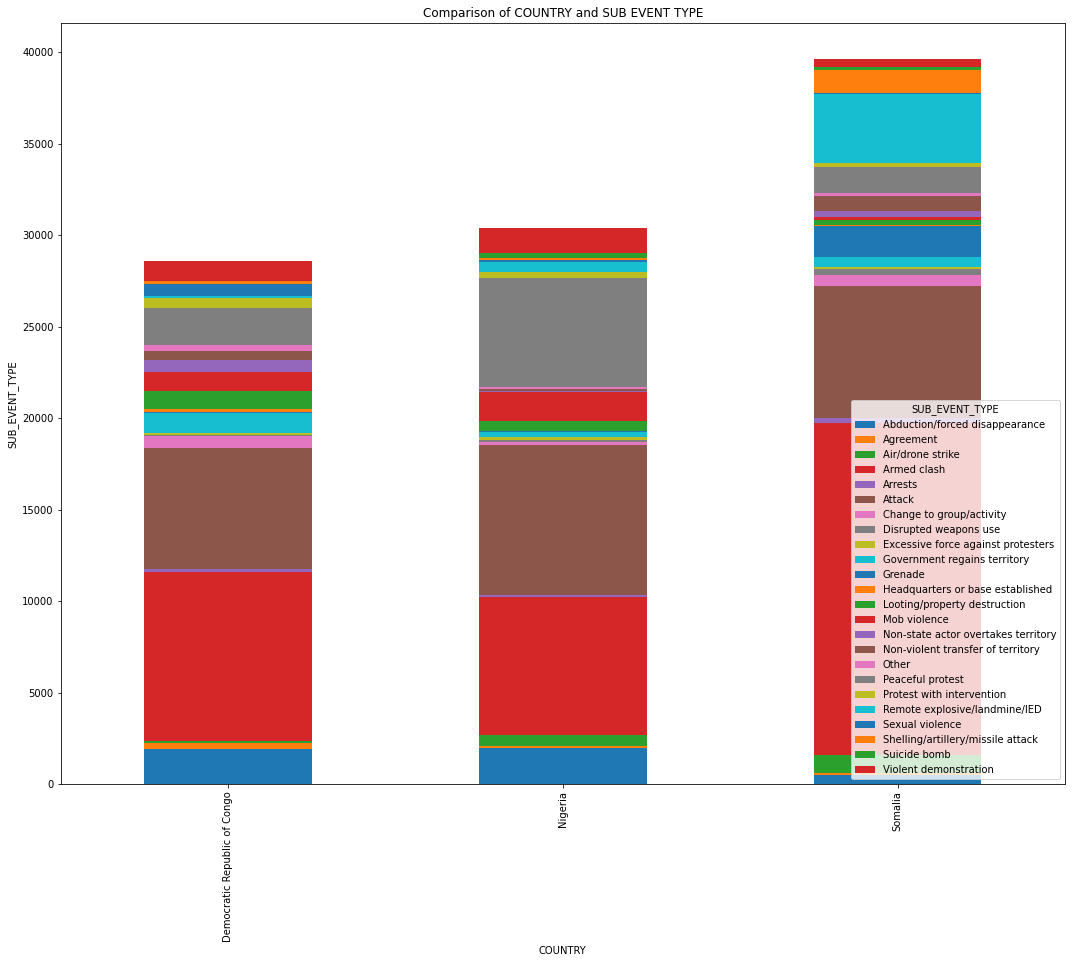

In [39]:
grouped_df = top_countries.groupby(['COUNTRY', 'SUB_EVENT_TYPE'])['COUNTRY'].count().unstack('SUB_EVENT_TYPE')
fig, ax = plt.subplots(figsize=(18,14)) # increase the figure size here

grouped_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('COUNTRY')
ax.set_ylabel('SUB_EVENT_TYPE')
ax.set_title('Comparison of COUNTRY and SUB EVENT TYPE')
plt.show()

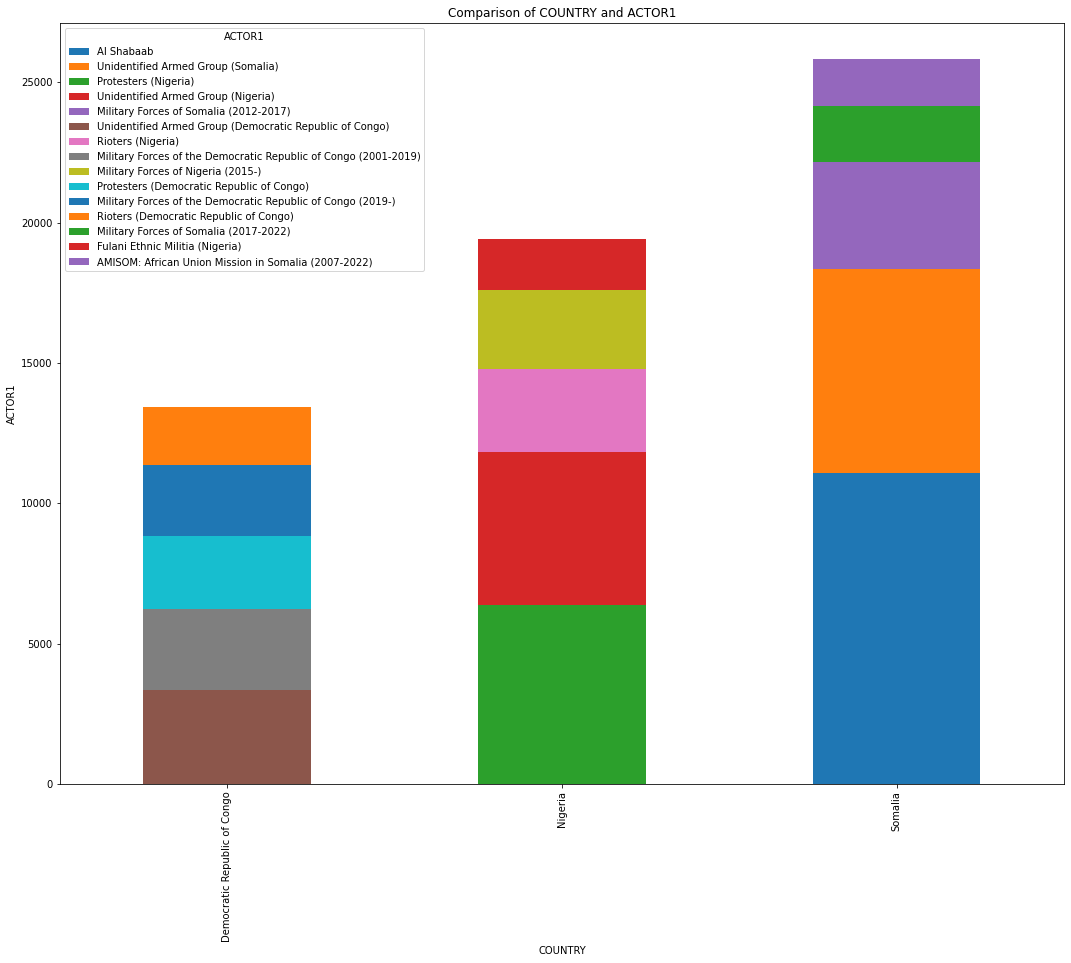

In [45]:
grouped_df = top_countries.groupby(['COUNTRY', 'ACTOR1'])['COUNTRY'].count().unstack('ACTOR1')
grouped_df = grouped_df.reindex(grouped_df.sum().sort_values(ascending=False).index[:15], axis=1)

fig, ax = plt.subplots(figsize=(18,14))

grouped_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('COUNTRY')
ax.set_ylabel('ACTOR1')
ax.set_title('Comparison of COUNTRY and ACTOR1')
plt.show()


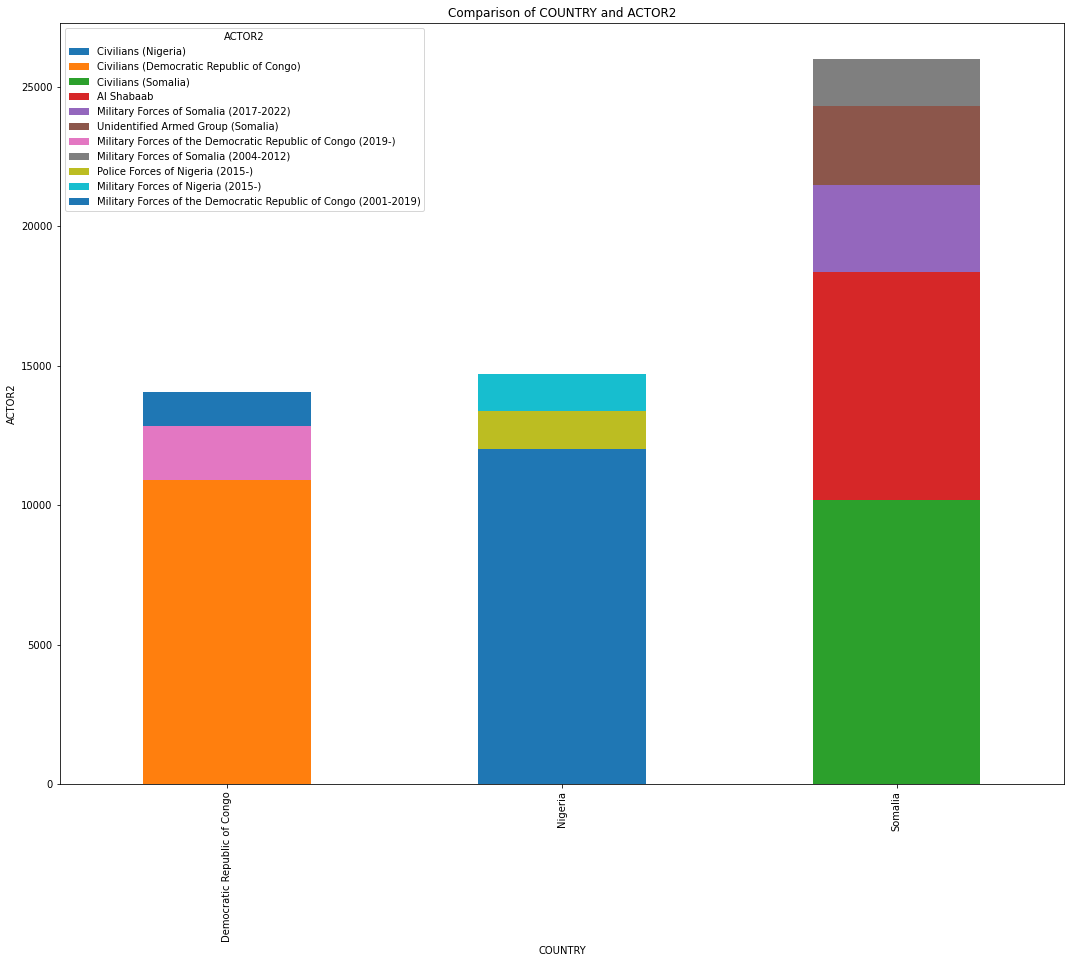

In [50]:
grouped_df = top_countries.groupby(['COUNTRY', 'ACTOR2'])['COUNTRY'].count().unstack('ACTOR2')
grouped_df = grouped_df.reindex(grouped_df.sum().sort_values(ascending=False).index[:11], axis=1)

fig, ax = plt.subplots(figsize=(18,14))

grouped_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('COUNTRY')
ax.set_ylabel('ACTOR2')
ax.set_title('Comparison of COUNTRY and ACTOR2')
plt.show()

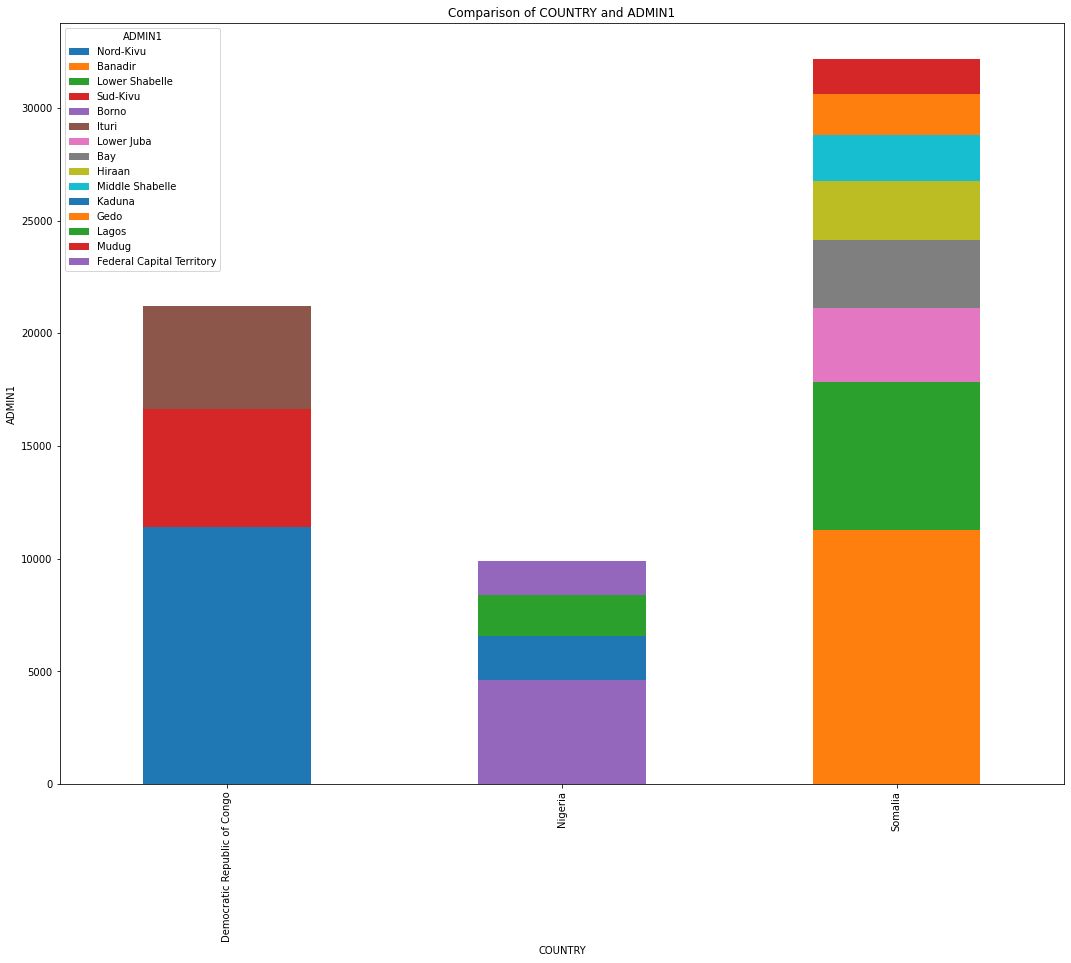

In [52]:
grouped_df = top_countries.groupby(['COUNTRY', 'ADMIN1'])['COUNTRY'].count().unstack('ADMIN1')
grouped_df = grouped_df.reindex(grouped_df.sum().sort_values(ascending=False).index[:15], axis=1)

fig, ax = plt.subplots(figsize=(18,14))

grouped_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('COUNTRY')
ax.set_ylabel('ADMIN1')
ax.set_title('Comparison of COUNTRY and ADMIN1')
plt.show()

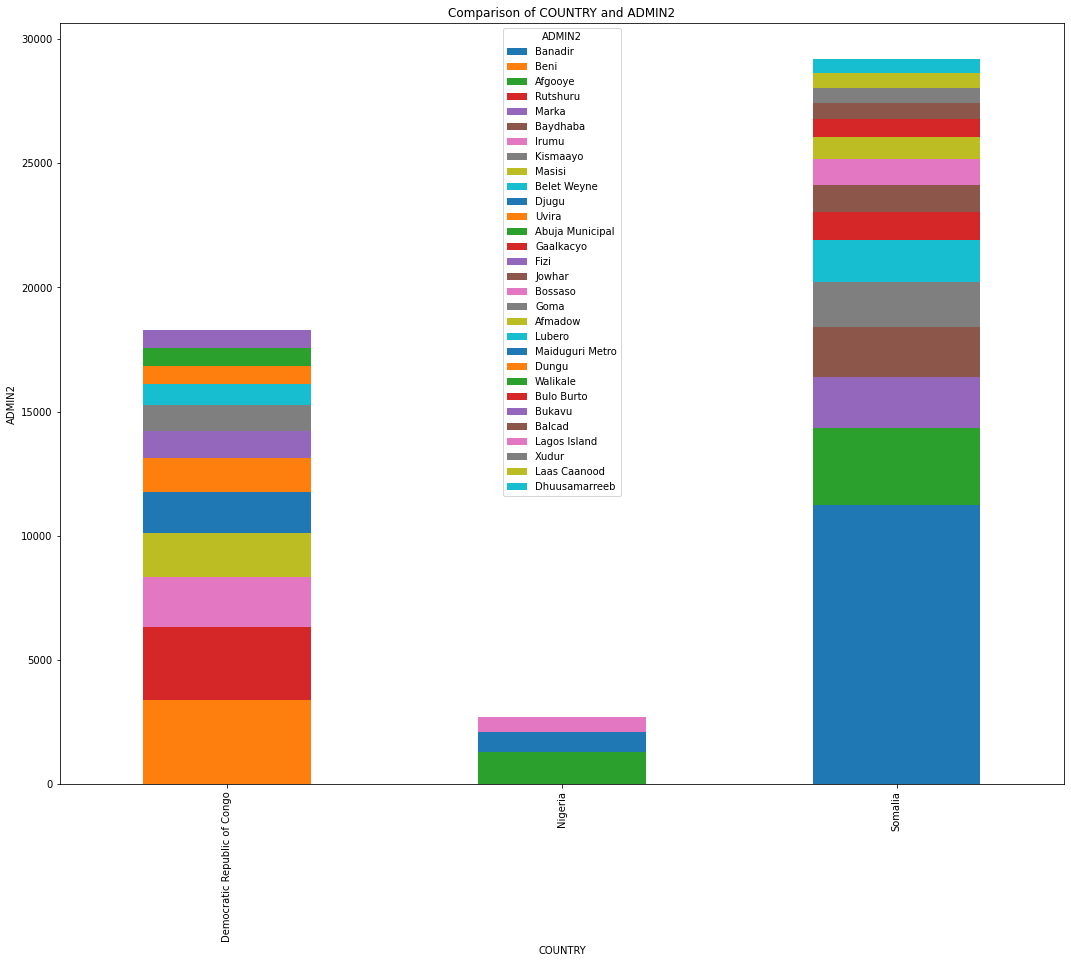

In [57]:
grouped_df = top_countries.groupby(['COUNTRY', 'ADMIN2'])['COUNTRY'].count().unstack('ADMIN2')
grouped_df = grouped_df.reindex(grouped_df.sum().sort_values(ascending=False).index[:30], axis=1)

fig, ax = plt.subplots(figsize=(18,14))

grouped_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('COUNTRY')
ax.set_ylabel('ADMIN2')
ax.set_title('Comparison of COUNTRY and ADMIN2')
plt.show()

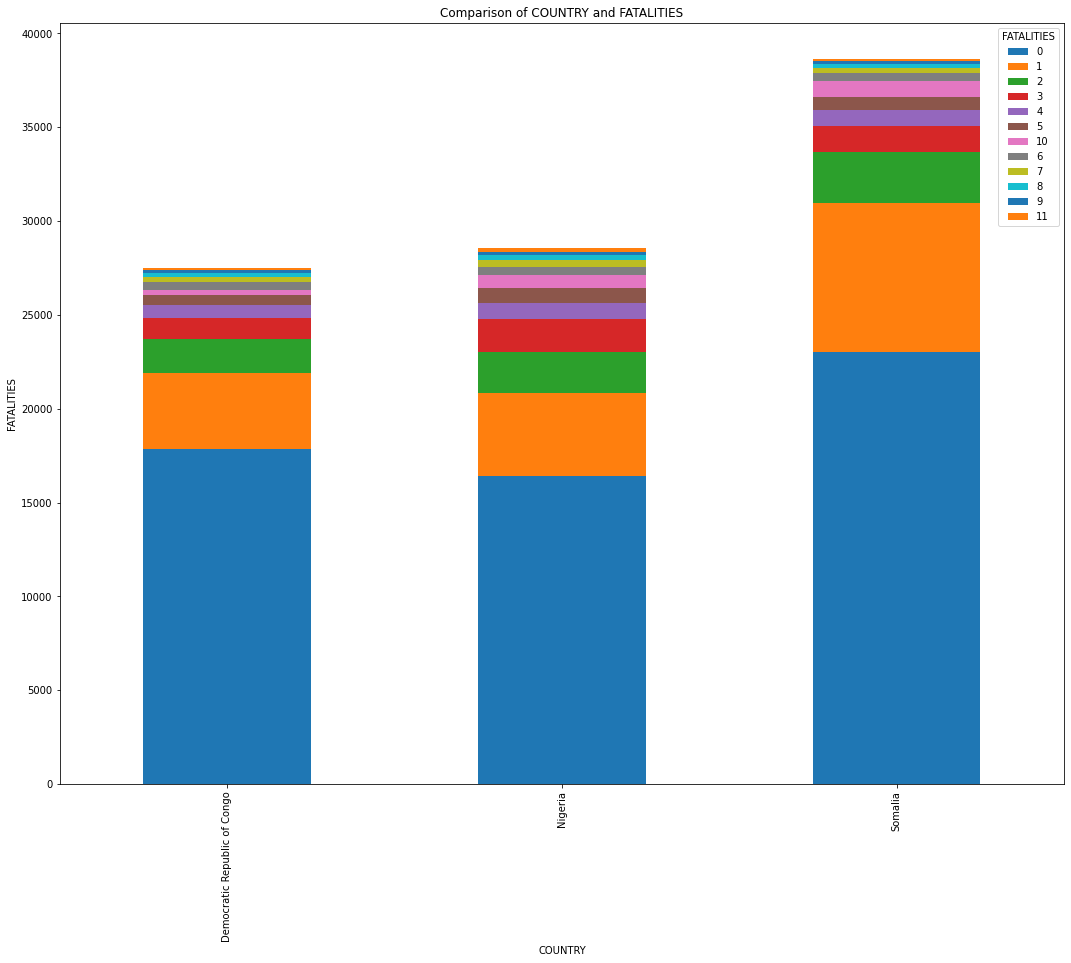

In [59]:
grouped_df = top_countries.groupby(['COUNTRY', 'FATALITIES'])['COUNTRY'].count().unstack('FATALITIES')
grouped_df = grouped_df.reindex(grouped_df.sum().sort_values(ascending=False).index[:12], axis=1)

fig, ax = plt.subplots(figsize=(18,14))

grouped_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('COUNTRY')
ax.set_ylabel('FATALITIES')
ax.set_title('Comparison of COUNTRY and FATALITIES')
plt.show()